# KANIKA GOEL


# THE SPARKS FOUNDATION



**Data Science and Business Analytics Internship**

**GRIPAUGUST2021**

**TASK-1**

*In this regression task we will predict the percentage of marks that a student is expected to scoe based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.* 

In [43]:
#importing all the libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
#reading data 
url ="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)

In [45]:
print(s_data.shape)
print("Data imported successfully")
s_data.head(25)

(25, 2)
Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [46]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


*Next, we plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between  the data. We can create the plot with the following script:*

In [48]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


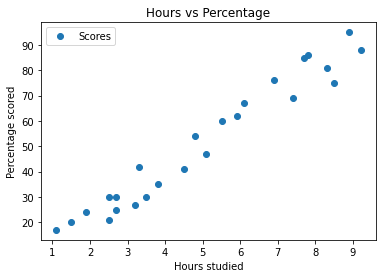

In [49]:
#plotting the distributions of scores
s_data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

*From the grapgh above, we can clearly see that there is a positive linear relation between number of hours studied and percentage of score*

In [51]:
s_data.corr(method = "spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [72]:
#nexr step is to divide the data into "attributes" (inputs) and "labels" (outputs)
x = s_data.iloc[:,:-1].values
y = s_data.iloc[:,-1].values

*next, we split this data into traning and test set by usning scikit-learn's built in train_test_split() method*


In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.7, random_state = 0)

In [75]:
#next, we train our data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

print("Training Completed")

Training Completed


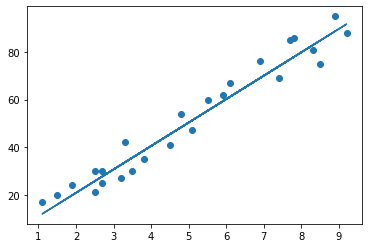

In [76]:
#ploting the regression line
line = regressor.coef_*x+regressor.intercept_

#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [77]:
#after trainning, our model is fit to make predictions
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]]


In [78]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})  
df 

,Actual,Predicted
0,20,15.869899
1,27,32.611468
2,69,73.972991
3,30,25.717881
4,62,59.201018
5,35,38.520257
6,24,19.809092
7,86,77.912184
8,76,69.049000
9,17,11.930706


*Finally, we evaluate the performance of algorithm to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.*

In [80]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.001787485958392


In [81]:
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.9546671754868552
